##### This file gives an overview over the generative process: a hidden Markov model (HMM)

In [5]:
import torch
import sys
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.animation as animation
from IPython.display import HTML

import modules from code folder

In [6]:
sys.path.append('code')

from generative_process import HMM

Create 1D flow environment

In [3]:
ns = 5
no = ns

# observations are either the state itself or its neighbors with lower probabilities

phi = torch.tensor([[0.70, 0.15, 0.00, 0.00, 0.15],
                    [0.15, 0.70, 0.15, 0.00, 0.00],
                    [0.00, 0.15, 0.70, 0.15, 0.00],
                    [0.00, 0.00, 0.15, 0.70, 0.15],
                    [0.15, 0.00, 0.00, 0.15, 0.70]])

pi = torch.tensor( [[0.40, 0.60, 0.00, 0.00, 0.00],
                    [0.00, 0.40, 0.60, 0.00, 0.00],
                    [0.00, 0.00, 0.40, 0.60, 0.00],
                    [0.00, 0.00, 0.00, 0.40, 0.60],
                    [0.60, 0.00, 0.00, 0.00, 0.40]])

prior_states = torch.tensor([0.10, 0.00, 0.00, 0.00, 0.00])

In [4]:
flow = HMM()

flow.set_parameters(pi, phi, prior_states)

T = 50

flow.simulate_timeseries(T)

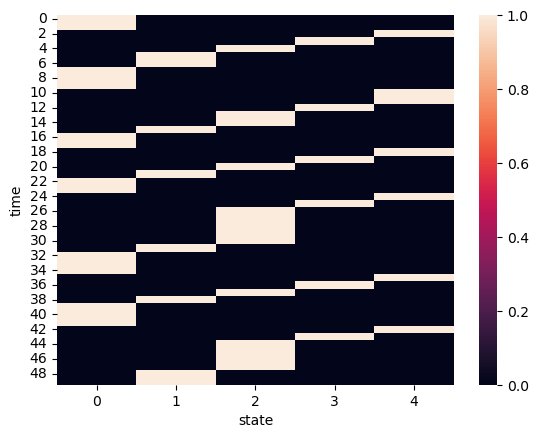

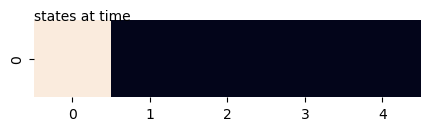

In [5]:
one_hot_states = torch.nn.functional.one_hot(torch.tensor(flow.states), num_classes=ns)

plt.figure()
sns.heatmap(one_hot_states)
plt.ylabel("time")
plt.xlabel("state")
plt.show()

fig, ax = plt.subplots(figsize=(ns,1))
sns.heatmap(torch.nn.functional.one_hot(flow.states[0], num_classes=ns)[None,:], ax = ax, cbar = False)
ax.annotate("states at time", xy=(0,0))
plt.show()


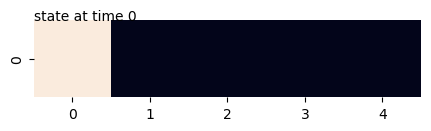

In [6]:
fig, ax = plt.subplots(figsize=(ns,1))

def animate(t):
    ax.cla()
    sns.heatmap(torch.nn.functional.one_hot(flow.states[t], num_classes=ns)[None,:], ax = ax, cbar = False)
    ax.annotate("state at time {0}".format(t), xy=(0,0))

anim = animation.FuncAnimation(fig, func=animate, frames=T, repeat = False, interval=700)

from IPython.display import HTML
HTML(anim.to_jshtml())
#fig.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_24080\3627185876.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


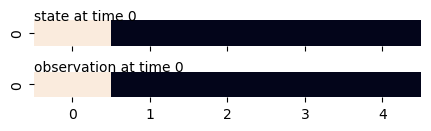

In [7]:
def fancy_movie():
    grid_kws = {"hspace":1}

    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(ns,1), gridspec_kw=grid_kws)

    def animate(t):
        ax[0].cla()
        sns.heatmap(torch.nn.functional.one_hot(flow.states[t], num_classes=ns)[None,:], ax = ax[0], cbar = False)
        ax[0].annotate("state at time {0}".format(t), xy=(0,0))
        ax[1].cla()
        sns.heatmap(torch.nn.functional.one_hot(flow.observations[t], num_classes=ns)[None,:], ax = ax[1], cbar = False)
        ax[1].annotate("observation at time {0}".format(t), xy=(0,0))

    anim = animation.FuncAnimation(fig, func=animate, frames=T, repeat = False, interval=700)

    fig.show()
    return anim

ani = fancy_movie()
HTML(ani.to_jshtml())